## Importing Tools

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from pyfume.Clustering import Clusterer
from pyfume.EstimateAntecendentSet import AntecedentEstimator
from pyfume.EstimateConsequentParameters import ConsequentEstimator
from pyfume.SimpfulModelBuilder import SugenoFISBuilder
from pyfume.Tester import SugenoFISTester
from pandas import read_csv 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, explained_variance_score
import matplotlib.pyplot as plt

<h2>Pre-processing Data</h2>
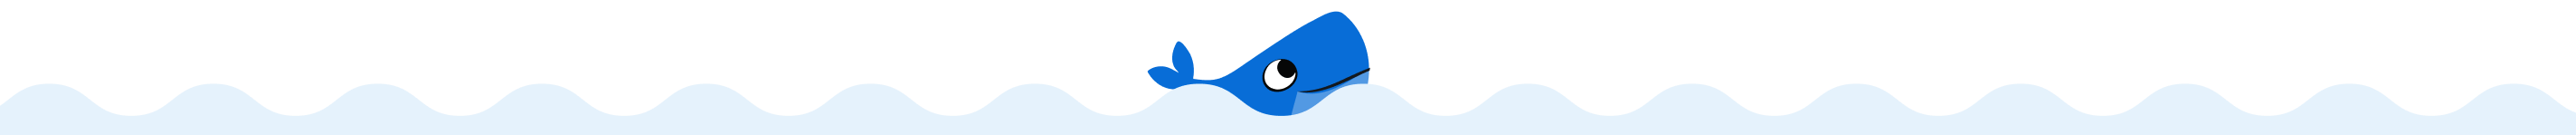

In [14]:
data = pd.read_csv('./data/hairdryer.csv',header=None)
indexes = ['inVolt', 'outTemp']
data.columns = indexes
indexes = indexes[:-1]
data.head()

,inVolt,outTemp
0,6.41,4.7661
1,3.41,4.7637
2,6.41,4.8394
3,6.41,5.0030
4,6.41,5.0176


In [15]:
dataX = data.drop('outTemp', axis = 1)
dataY = data.outTemp

xTrain, xTest, yTrain, yTest = train_test_split(dataX, dataY, test_size = 0.3, random_state=0)

xTrain = xTrain.to_numpy()
xTest = xTest.to_numpy()
yTrain = yTrain.array
yTest = yTest.array

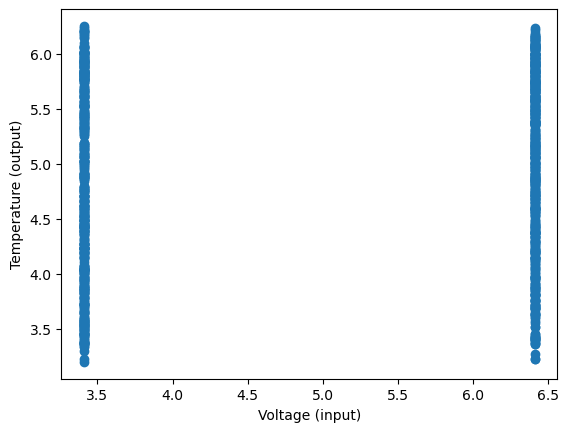

In [16]:
plt.scatter(dataX, dataY)
plt.xlabel('Voltage (input)')  
plt.ylabel('Temperature (output)')  
plt.show()

## Building the model

#### FCM

In [17]:
mseArray1 = []
for clustNum in range(2, 25):
    clusters = Clusterer(x_train=xTrain, y_train=yTrain, nr_clus=clustNum)
        
    clustCenters, partMatrix, _ = clusters.cluster(method='fcm')
        
    antEst = AntecedentEstimator(xTrain, partMatrix)
    antParams = antEst.determineMF()
        
    conseqEst = ConsequentEstimator(xTrain, yTrain, partMatrix)
    conseqParams = conseqEst.suglms()
        
    # Build first-order Takagi-Sugeno model
    modbuilder = SugenoFISBuilder(antParams, conseqParams, indexes, save_simpful_code=False)
    model = modbuilder.get_model()
        
    # Get model predictions
    modtester = SugenoFISTester(model, xTest, indexes)
    yPrediction = modtester.predict()[0]

    mse = mean_squared_error(yTest, yPrediction)
    mseArray1.append(mse)        


 * Detected 2 rules / clusters
 * Detected Sugeno model type
 * Detected 3 rules / clusters
 * Detected Sugeno model type
 * Detected 4 rules / clusters
 * Detected Sugeno model type
 * Detected 5 rules / clusters
 * Detected Sugeno model type
 * Detected 6 rules / clusters
 * Detected Sugeno model type
 * Detected 7 rules / clusters
 * Detected Sugeno model type
 * Detected 8 rules / clusters
 * Detected Sugeno model type
 * Detected 9 rules / clusters
 * Detected Sugeno model type
 * Detected 10 rules / clusters
 * Detected Sugeno model type
 * Detected 11 rules / clusters
 * Detected Sugeno model type
 * Detected 12 rules / clusters
 * Detected Sugeno model type
 * Detected 13 rules / clusters
 * Detected Sugeno model type
 * Detected 14 rules / clusters
 * Detected Sugeno model type
 * Detected 15 rules / clusters
 * Detected Sugeno model type
 * Detected 16 rules / clusters
 * Detected Sugeno model type
 * Detected 17 rules / clusters
 * Detected Sugeno model type
 * Detected 18 r

#### GK

In [18]:
mseArray2 = []
for clustNum in range(2, 25):
    clusters = Clusterer(x_train=xTrain, y_train=yTrain, nr_clus=clustNum)
        
    clustCenters, partMatrix, _ = clusters.cluster(method='gk')
        
    antEst = AntecedentEstimator(xTrain, partMatrix)
    antParams = antEst.determineMF()
        
    conseqEst = ConsequentEstimator(xTrain, yTrain, partMatrix)
    conseqParams = conseqEst.suglms()
        
    # Build first-order Takagi-Sugeno model
    modbuilder = SugenoFISBuilder(antParams, conseqParams, indexes, save_simpful_code=False)
    model = modbuilder.get_model()
        
    # Get model predictions
    modtester = SugenoFISTester(model, xTest, indexes)
    yPrediction = modtester.predict()[0]

    mse = mean_absolute_percentage_error(yTest, yPrediction)
    mseArray2.append(mse)


 * Detected 2 rules / clusters
 * Detected Sugeno model type
 * Detected 3 rules / clusters
 * Detected Sugeno model type
 * Detected 4 rules / clusters
 * Detected Sugeno model type
 * Detected 5 rules / clusters
 * Detected Sugeno model type
 * Detected 6 rules / clusters
 * Detected Sugeno model type
 * Detected 7 rules / clusters
 * Detected Sugeno model type
 * Detected 8 rules / clusters
 * Detected Sugeno model type
 * Detected 9 rules / clusters
 * Detected Sugeno model type
 * Detected 10 rules / clusters
 * Detected Sugeno model type
 * Detected 11 rules / clusters
 * Detected Sugeno model type
 * Detected 12 rules / clusters
 * Detected Sugeno model type
 * Detected 13 rules / clusters
 * Detected Sugeno model type
 * Detected 14 rules / clusters
 * Detected Sugeno model type
 * Detected 15 rules / clusters
 * Detected Sugeno model type
 * Detected 16 rules / clusters
 * Detected Sugeno model type
 * Detected 17 rules / clusters
 * Detected Sugeno model type
 * Detected 18 r

#### Local Fit

In [23]:
mseArray3 = []
for clustNum in range(2, 4):
    clusters = Clusterer(x_train=xTrain, y_train=yTrain, nr_clus=clustNum)
        
    clustCenters, partMatrix, _ = clusters.cluster(method='gk')
        
    antEst = AntecedentEstimator(xTrain, partMatrix)
    antParams = antEst.determineMF()
        
    conseqEst = ConsequentEstimator(xTrain, yTrain, partMatrix)
    conseqParams = conseqEst.suglms(global_fit=False)
        
    # Build first-order Takagi-Sugeno model
    modbuilder = SugenoFISBuilder(antParams, conseqParams, indexes, save_simpful_code=False)
    model = modbuilder.get_model()
        
    # Get model predictions
    modtester = SugenoFISTester(model, xTest, indexes)
    yPrediction = modtester.predict()[0]

    mse = mean_absolute_percentage_error(yTest, yPrediction)
    mseArray3.append(mse)

 * Detected 2 rules / clusters
 * Detected Sugeno model type
 * Detected 3 rules / clusters
 * Detected Sugeno model type


#### Global Fit

In [24]:
mseArray4 = []
for clustNum in range(2, 4):
    clusters = Clusterer(x_train=xTrain, y_train=yTrain, nr_clus=clustNum)
        
    clustCenters, partMatrix, _ = clusters.cluster(method='gk')
        
    antEst = AntecedentEstimator(xTrain, partMatrix)
    antParams = antEst.determineMF()
        
    conseqEst = ConsequentEstimator(xTrain, yTrain, partMatrix)
    conseqParams = conseqEst.suglms(global_fit=True,df=0)
        
    # Build first-order Takagi-Sugeno model
    modbuilder = SugenoFISBuilder(antParams, conseqParams, indexes, save_simpful_code=False)
    model = modbuilder.get_model()
        
    # Get model predictions
    modtester = SugenoFISTester(model, xTest, indexes)
    yPrediction = modtester.predict()[0]

    mse = mean_absolute_percentage_error(yTest, yPrediction)
    mseArray4.append(mse)

 * Detected 2 rules / clusters
 * Detected Sugeno model type
 * Detected 3 rules / clusters
 * Detected Sugeno model type


## Plot results

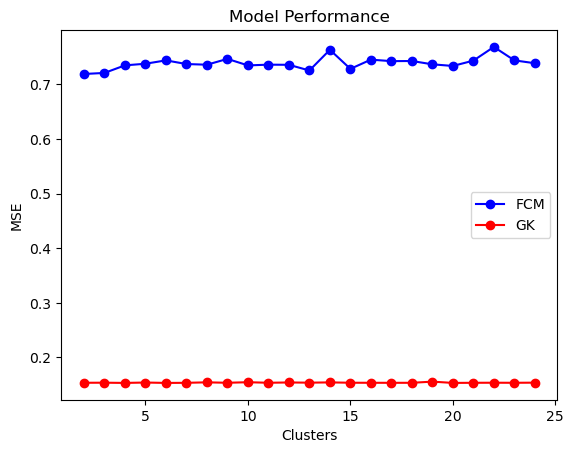

In [25]:
plt.plot(range(2,25), mseArray1, label="FCM", color="blue", marker="o")
plt.plot(range(2,25), mseArray2, label="GK", color="red", marker="o",)
plt.xlabel("Clusters")
plt.ylabel("MSE")
plt.title("Model Performance")
plt.legend()
plt.show()

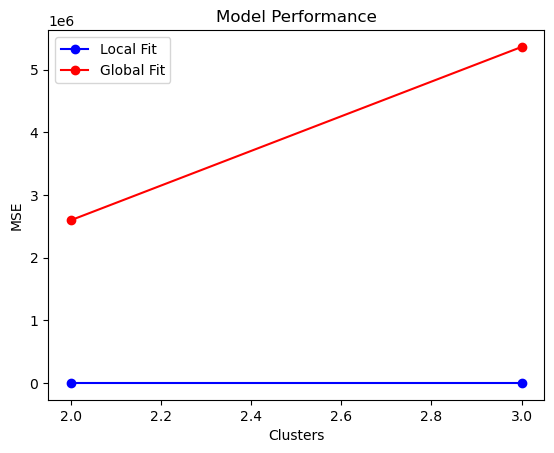

In [27]:
plt.plot(range(2,4), mseArray3, label="Local Fit", color="blue", marker="o")
plt.plot(range(2,4), mseArray4, label="Global Fit", color="red", marker="o",)
plt.xlabel("Clusters")
plt.ylabel("MSE")
plt.title("Model Performance")
plt.legend()
plt.show()

## Best Model

In [38]:
clusters = Clusterer(x_train=xTrain, y_train=yTrain, nr_clus=2)
        
clustCenters, partMatrix, _ = clusters.cluster(method='gk')
    
antEst = AntecedentEstimator(xTrain, partMatrix)
antParams = antEst.determineMF()
    
conseqEst = ConsequentEstimator(xTrain, yTrain, partMatrix)
conseqParams = conseqEst.suglms(global_fit=False)
    
# Build first-order Takagi-Sugeno model
modbuilder = SugenoFISBuilder(antParams, conseqParams, indexes, save_simpful_code=False)
model = modbuilder.get_model()
    
# Get model predictions
modtester = SugenoFISTester(model, xTest, indexes)
yPrediction = modtester.predict()[0]

mse = mean_absolute_percentage_error(yTest, yPrediction)
print(f"Best F1 Score: {mse} (Cluster Count: 2)")

 * Detected 2 rules / clusters
 * Detected Sugeno model type
Best F1 Score: 0.15371541901028019 (Cluster Count: 2)
